Mini Project
<br> Autors: Nishan Karki and Rokin Maharjan <br>
Professor: Dr. Javier Orduz <br>
Course: CSI 5V93 S1 - Intro to Quantum Computing

# Mini Project: Application of Classical and Quantum K-Means

# Importing Libraries

In [ ]:
# Installing qiskit for quantum implementation.
!pip install qiskit

In [ ]:
# Importing python libraries as needed.
import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi

# Scaler for normalizing the dataset.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# PCA for dimension reduction.
from sklearn.decomposition import PCA

# Import classical K-Means library.
from sklearn.cluster import KMeans

# Data import and Preprocessing

In [ ]:
# Data import and preprocessing (To be uploaded from system files).
from google.colab import files
uploaded = files.upload()   # Choose the file to upload.

Saving primates_induction_data.tsv to primates_induction_data (1).tsv


In [ ]:
# Uploading the csv data file.
primate_data = pd.read_csv(io.BytesIO(uploaded['primates_induction_data.tsv']), sep='\t')
primate_data.head()

,ID,DrinkingCategory,Species,Sex,Age,Cortisol,ACTH,Testosterone,Deoxycorticosterone,Aldosterone,...,IL_1RA,TNF_a,IL_2,IP_10,MIG,IL_4,IL_8,IL_23,VEGF_D,MIF
0,10005,LD,Cyno,M,6.253380,17.471081,57.550000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10006,VHD,Cyno,M,5.585330,18.110541,47.962778,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10007,VHD,Cyno,M,5.872811,13.302162,58.812162,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10008,VHD,Cyno,M,6.069940,17.550000,56.768108,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10010,LD,Cyno,M,6.650376,17.500270,67.596216,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filtering the features that are required for the clustering.
# Here, we only take 13 features most important features from the original dataset.

names_h = ['ID', 'DrinkingCategory', 'Species', 'Sex', 'Age', 'Cortisol', 'ACTH', 'Testosterone',
           'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']
filtered_primates = pd.DataFrame(primate_data.filter(names_h).dropna(), columns=names_h)
# print(filtered_primates.count())
filtered_primates = filtered_primates.reset_index(drop = 'true')

# Filtering and dropping out null value.
# Our final data set has 31 primates with 13 features.
filtered_primates.head()

,ID,DrinkingCategory,Species,Sex,Age,Cortisol,ACTH,Testosterone,Deoxycorticosterone,Aldosterone,DHEAS,Osteocalcin,CTX
0,10048,LD,Rhesus,M,9.856465,28.11,31.0,9.34,346.0,169.33,0.093,7.183333,0.643667
1,10049,HD,Rhesus,M,9.815397,29.09,41.0,14.02,464.0,119.57,0.086,11.176667,0.664667
2,10051,BD,Rhesus,M,9.224009,25.64,29.0,7.73,325.0,105.93,0.078,12.913333,0.904333
3,10052,LD,Rhesus,M,9.177464,27.76,12.0,2.99,373.0,169.67,0.139,11.400000,0.912000
4,10054,BD,Rhesus,M,8.030281,30.78,39.0,7.68,413.0,106.07,0.101,8.656667,0.946667


In [ ]:
# For PCA and K-Means we further choose 9 relevant features.
# 'ID', 'DrinkingCategory', 'Species'and 'Sex' features are removed.
# The removed features are not relevent for calculations.

names_i = ['Age', 'Cortisol', 'ACTH', 'Testosterone','Deoxycorticosterone',
           'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']
final_primates = pd.DataFrame(filtered_primates.filter(names_i).dropna(), columns=names_i)
final_primates.head()

,Age,Cortisol,ACTH,Testosterone,Deoxycorticosterone,Aldosterone,DHEAS,Osteocalcin,CTX
0,9.856465,28.11,31.0,9.34,346.0,169.33,0.093,7.183333,0.643667
1,9.815397,29.09,41.0,14.02,464.0,119.57,0.086,11.176667,0.664667
2,9.224009,25.64,29.0,7.73,325.0,105.93,0.078,12.913333,0.904333
3,9.177464,27.76,12.0,2.99,373.0,169.67,0.139,11.400000,0.912000
4,8.030281,30.78,39.0,7.68,413.0,106.07,0.101,8.656667,0.946667


# Standarizing given dataset

In [ ]:
# Standarazing the given data set
# We choose standard scalar as it will transform each value in the column to 
# range about the mean 0 and standard deviation 1.

scaler = preprocessing.StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(final_primates))
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,2.121399,-0.624901,-0.140380,0.629145,0.186948,-0.117890,-0.790277,-1.756112,-1.669176
1,2.097132,-0.580311,0.506823,1.514687,1.595511,-0.426652,-0.865492,-1.305755,-1.624648
2,1.747680,-0.737285,-0.269821,0.324503,-0.063728,-0.511288,-0.951452,-1.109898,-1.116455
3,1.720176,-0.640826,-1.370067,-0.572392,0.509247,-0.115780,-0.296007,-1.280568,-1.100199
4,1.042303,-0.503417,0.377382,0.315042,0.986725,-0.510420,-0.704317,-1.589954,-1.026691


# Implementing PCA (Principal Componemt Analysis)

In [ ]:
# Perform PCA (Principal Component Analysis) for dimension reduction.
# We reduce the dimensions to 2 by preseving 56.8% variance.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by principal components: {:.2%}'.format(
    np.sum(pca.explained_variance_ratio_)))

# Final array after PCA.
pca_result

Explained variation per principal component: [0.33319796 0.23493559]
Cumulative variance explained by principal components: 56.81%


array([[ 3.06127518, -0.8233846 ],
       [ 3.45860269, -0.29745402],
       [ 2.17032001, -1.25685639],
       [ 1.77204453, -0.76025162],
       [ 2.27256392, -0.68195656],
       [ 2.47775274, -1.07389839],
       [ 1.23516709, -0.43947029],
       [ 0.71547627,  1.13911875],
       [ 0.60125069, -1.01908967],
       [ 3.25040263,  5.94375689],
       [-1.53133624, -0.04856222],
       [-0.56672922,  1.76171111],
       [-0.38078695, -0.84186935],
       [-1.18393875, -0.35217251],
       [-1.65306633,  0.89155021],
       [-2.09931709,  0.49369124],
       [-0.2786571 , -0.34322526],
       [-0.59980111, -0.59280466],
       [ 0.81806641, -0.44839727],
       [ 0.81757577, -1.33152214],
       [-0.1844652 , -0.00646583],
       [-0.02174984, -0.81389852],
       [-0.23067364, -1.33082901],
       [-1.18608121, -0.14739118],
       [-2.23973675, -0.11972801],
       [-1.22824464, -1.17057462],
       [-2.25121674, -0.60221919],
       [-2.22676515,  2.70965959],
       [-1.72634319,

Text(0, 0.5, 'Y Axis')

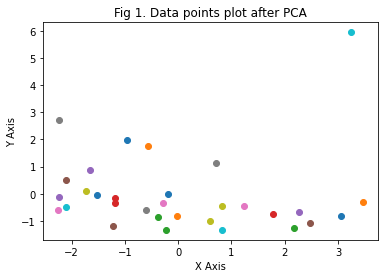

In [ ]:
n_rows = pca_result.shape[0]
n_features = pca_result.shape[1]
n_clusters = pca_result.shape[1]

# Plottting all data points in 2 dimensions after PCA.
# This will give us general idea about datapoint distribution.

for i in range(n_rows):
  plt.scatter(pca_result[i, 0], pca_result[i, 1], label='cluster' + str(i))

plt.title("Fig 1. Data points plot after PCA")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Implementing classical K-Means

In [ ]:
# Importing K-Means and fitting our dataset.
# Predicting labels and centroids.

kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(pca_result)
centroids = kmeans.cluster_centers_

In [ ]:
# Adding K-Means lables to the original dataset.

kmeans_df = filtered_primates
kmeans_df['K-MeansLabels'] = label
kmeans_df.head()

,ID,DrinkingCategory,Species,Sex,Age,Cortisol,ACTH,Testosterone,Deoxycorticosterone,Aldosterone,DHEAS,Osteocalcin,CTX,K-MeansLabels
0,10048,LD,Rhesus,M,9.856465,28.11,31.0,9.34,346.0,169.33,0.093,7.183333,0.643667,1
1,10049,HD,Rhesus,M,9.815397,29.09,41.0,14.02,464.0,119.57,0.086,11.176667,0.664667,1
2,10051,BD,Rhesus,M,9.224009,25.64,29.0,7.73,325.0,105.93,0.078,12.913333,0.904333,1
3,10052,LD,Rhesus,M,9.177464,27.76,12.0,2.99,373.0,169.67,0.139,11.400000,0.912000,1
4,10054,BD,Rhesus,M,8.030281,30.78,39.0,7.68,413.0,106.07,0.101,8.656667,0.946667,1


In [ ]:
# Getting id-array to get labels for rach point in dataset for accuracy calculation.

names_print = ['ID', 'Age', 'DrinkingCategory', 'Species', 'Sex', 'Age', 'K-MeansLabels']
pca_print = pd.DataFrame(kmeans_df.filter(names_print), columns=names_print)
pca_print.head()

id_array = pca_print['ID'].tolist()
id_array = list(map(str, id_array))
id_array = [x[-2:] + ',' for x in id_array]

cat_array = pca_print['DrinkingCategory'].tolist()
cat_array = list(map(str, cat_array))

id_array = np.char.add(id_array, cat_array)
# print(id_array)
id_array = [x[-6:] for x in id_array]

pca1_scores = pca_result[:, 0]
pca2_scores = pca_result[:, 1]

In [ ]:
# Calculating resulting label accuracy.

acc_print = pca_print.reset_index(drop = 'true')
acc_print.loc[acc_print['DrinkingCategory'] == ('LD'), 'state_0'] = 0
acc_print.loc[acc_print['DrinkingCategory'] == ('BD'), 'state_0'] = 0
acc_print.loc[acc_print['DrinkingCategory'] == ('VHD'), 'state_0'] = 1
acc_print.loc[acc_print['DrinkingCategory'] == ('HD'), 'state_0'] = 1

acc_print.loc[acc_print['DrinkingCategory'] == ('LD'), 'state_1'] = 1
acc_print.loc[acc_print['DrinkingCategory'] == ('BD'), 'state_1'] = 1
acc_print.loc[acc_print['DrinkingCategory'] == ('VHD'), 'state_1'] = 0
acc_print.loc[acc_print['DrinkingCategory'] == ('HD'), 'state_1'] = 0

LD_BD_0_accuracy = 0
LD_BD_1_accuracy = 0
for index, row in acc_print.iterrows():
  if((row['state_0'] == row['K-MeansLabels'])):
    LD_BD_0_accuracy = LD_BD_0_accuracy+1
Accuracy_L0 =( LD_BD_0_accuracy / acc_print.shape[0])* 100
print('Accuracy K-Means when LD and BD are set to 0: ' + str(Accuracy_L0) + ' %')

for index, row in acc_print.iterrows():
  if((row['state_1'] == row['K-MeansLabels'])):
    LD_BD_1_accuracy = LD_BD_1_accuracy+1
Accuracy_L1 =( LD_BD_1_accuracy / acc_print.shape[0])* 100
print('Accuracy of K-Means when LD and BD are set to 1: ' + str(Accuracy_L1)+ ' %')

Accuracy = max(Accuracy_L0, Accuracy_L1)
print('Maximum accuracy of K-Means: ' + str(Accuracy) + ' %')

acc_print.head()

Accuracy K-Means when LD and BD are set to 0: 32.25806451612903 %
Accuracy of K-Means when LD and BD are set to 1: 67.74193548387096 %
Maximum accuracy of K-Means: 67.74193548387096 %


,ID,Age,DrinkingCategory,Species,Sex,Age,K-MeansLabels,state_0,state_1
0,10048,9.856465,LD,Rhesus,M,9.856465,1,0.0,1.0
1,10049,9.815397,HD,Rhesus,M,9.815397,1,1.0,0.0
2,10051,9.224009,BD,Rhesus,M,9.224009,1,0.0,1.0
3,10052,9.177464,LD,Rhesus,M,9.177464,1,0.0,1.0
4,10054,8.030281,BD,Rhesus,M,8.030281,1,0.0,1.0


In [ ]:
!pip install adjustText

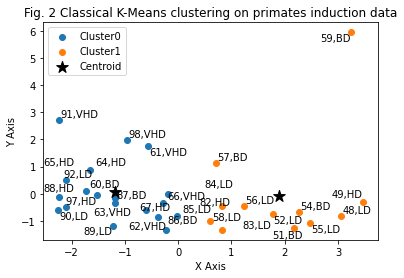

In [ ]:
# Plotting results after PCA and K-Means.
import adjustText as ad

fig, ax = plt.subplots()
u_labels = np.unique(label)

# Plotting each datapoints.
for i in u_labels:
    plt.scatter(pca_result[label == i, 0], pca_result[label == i, 1], label='Cluster' + str(i))

# PLotting centroids.
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, color='k', marker='*', label='Centroid')

# Plotting data points label (Monkey ID and Drinking Category).
texts = []
for i, txt in enumerate(id_array):
    texts.append(ax.text(pca1_scores[i], pca2_scores[i], id_array[i]))
ad.adjust_text(texts)

plt.title("Fig. 2 Classical K-Means clustering on primates induction data")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

# Implementing Quantum K-Means

In [ ]:
# importing quantum libraries
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from copy import deepcopy

In [ ]:
# Assigning number of data points and number of clusters
all_datapoints = pca_result
n = all_datapoints.shape[0]
k = all_datapoints.shape[1]
c = all_datapoints.shape[1]
all_datapoints

array([[ 3.06127518, -0.8233846 ],
       [ 3.45860269, -0.29745402],
       [ 2.17032001, -1.25685639],
       [ 1.77204453, -0.76025162],
       [ 2.27256392, -0.68195656],
       [ 2.47775274, -1.07389839],
       [ 1.23516709, -0.43947029],
       [ 0.71547627,  1.13911875],
       [ 0.60125069, -1.01908967],
       [ 3.25040263,  5.94375689],
       [-1.53133624, -0.04856222],
       [-0.56672922,  1.76171111],
       [-0.38078695, -0.84186935],
       [-1.18393875, -0.35217251],
       [-1.65306633,  0.89155021],
       [-2.09931709,  0.49369124],
       [-0.2786571 , -0.34322526],
       [-0.59980111, -0.59280466],
       [ 0.81806641, -0.44839727],
       [ 0.81757577, -1.33152214],
       [-0.1844652 , -0.00646583],
       [-0.02174984, -0.81389852],
       [-0.23067364, -1.33082901],
       [-1.18608121, -0.14739118],
       [-2.23973675, -0.11972801],
       [-1.22824464, -1.17057462],
       [-2.25121674, -0.60221919],
       [-2.22676515,  2.70965959],
       [-1.72634319,

In [ ]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(all_datapoints, axis = 0)
std = np.std(all_datapoints, axis = 0)
centers = np.random.randn(k,c)*std + mean
centers

array([[-1.46126692,  0.26171436],
       [ 2.04814565, -1.81637465]])

Text(0, 0.5, 'Y Axis')

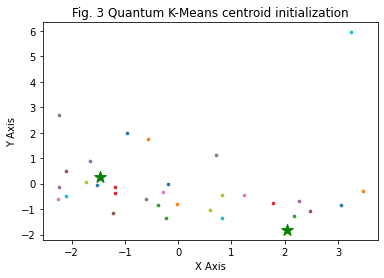

In [ ]:
# Plotting datapoints after centroids initialization
for i in range(n):
    plt.scatter(all_datapoints[i, 0], all_datapoints[i,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

plt.title("Fig. 3 Quantum K-Means centroid initialization")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

In [ ]:
def point_centroid_distances(point, centroids):

    results_list = []
    # Using Local quantum simulator.
    backend = Aer.get_backend('qasm_simulator')
    
    # Calculating theta and phi values
    phi_list = [((x + 1) * pi / 2) for x in [point[0], centroids[0][0], centroids[1][0]]]
    theta_list = [((x + 1) * pi / 2) for x in [point[1], centroids[0][1], centroids[1][1]]]

    # Creating a 4 qbit quantum register and 1 classical register
    qr = QuantumRegister(4, 'qr')
    cr = ClassicalRegister(1, 'cr')
    qc = QuantumCircuit(qr, cr, name='qc')

    # Calculating distances from the new point to the centroids
    for i in range(1, 3):

        # Apply the operators.
        qc.h(qr[2])
        qc.h(qr[1])
        qc.h(qr[3])
        qc.u(theta_list[0], phi_list[0], 0, qr[0])
        qc.u(theta_list[i], phi_list[i], 0, qr[1]) 
        qc.cswap(qr[2], qr[0], qr[1])
        qc.h(qr[2]) 
        qc.measure(qr[2], cr[0])
        qc.reset(qr)

        # Executing job
        job = execute(qc, backend=backend, shots=5000)
        result = job.result().get_counts(qc)
        try:
            results_list.append(result['1'])
        except:
            results_list.append(0)
    return results_list

In [ ]:
# Executing the circuit.
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)

clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)
upper_error = error + 1

# When, after an update, the estimate of that center stays the same, exit loop
while (error + 0.02) < upper_error:
    # Measure the distance to every center
    
    distances = np.array(list(map(lambda x: point_centroid_distances(x, centers), all_datapoints)))

    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(all_datapoints[clusters == i], axis=0)
    upper_error = deepcopy(error)
    error = np.linalg.norm(centers_new - centers_old)
    if error < 0.02:
        break
print(centers_new)
q_labels = clusters

[[-0.21282143  1.74344598]
 [ 0.06207292 -0.50850508]]


In [ ]:
acc_print['Q_kmensLabels'] = q_labels
acc_print.head()

,ID,Age,DrinkingCategory,Species,Sex,Age,K-MeansLabels,state_0,state_1,Q_kmensLabels
0,10048,9.856465,LD,Rhesus,M,9.856465,1,0.0,1.0,1
1,10049,9.815397,HD,Rhesus,M,9.815397,1,1.0,0.0,1
2,10051,9.224009,BD,Rhesus,M,9.224009,1,0.0,1.0,1
3,10052,9.177464,LD,Rhesus,M,9.177464,1,0.0,1.0,1
4,10054,8.030281,BD,Rhesus,M,8.030281,1,0.0,1.0,1


In [ ]:
LD_BD_0_qaccuracy = 0
LD_BD_1_qaccuracy = 0
for index, row in acc_print.iterrows():
  if((row['state_0'] == row['Q_kmensLabels'])):
    LD_BD_0_qaccuracy = LD_BD_0_qaccuracy+1
# print(LD_BD_0_qaccuracy)
QAccuracy_L0 =( LD_BD_0_qaccuracy / acc_print.shape[0])* 100
print(QAccuracy_L0)

for index, row in acc_print.iterrows():
  if((row['state_1'] == row['Q_kmensLabels'])):
    LD_BD_1_qaccuracy = LD_BD_1_qaccuracy+1
QAccuracy_L1 =( LD_BD_1_qaccuracy / acc_print.shape[0])* 100
print(QAccuracy_L1)

38.70967741935484
61.29032258064516


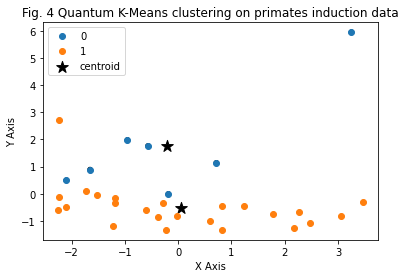

In [ ]:
x = all_datapoints[:,0]
y = all_datapoints[:,1]
z = q_labels

a_print = {'X':x,'Y':y, 'Z':z}
df_print = pd.DataFrame(a_print)
# print(df_print)

groups = df_print.groupby('Z')
for name, group in groups:
    plt.plot(group.X, group.Y, marker='o', linestyle='', label=name)
plt.scatter(centers_new[:, 0], centers_new[:, 1], s=150, color='k', marker='*', label='centroid')

plt.scatter(df_print.X, df_print.Y, s=20, c=df_print.Z, cmap='gray')

plt.title("Fig. 4 Quantum K-Means clustering on primates induction data")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()


# References

1) Cqcl. “Qiskit-Tutorial/Community/Awards/teach_me_qiskit_2018/quantum_machine_learning at Master · CQCL/Qiskit-Tutorial.” GitHub, https://github.com/CQCL/qiskit-tutorial/tree/master/community/awards/teach_me_qiskit_2018/quantum_machine_learning. 

2) Morcu. “Morcu/Q-Means: Quantic Implementation of the K-Means Clustering Algorithm.” GitHub, https://github.com/Morcu/q-means. 

# END